In [1]:
########################### Connectivity Matrix  ##################################
# The purpose of this script is to make connectivity matrices of the sediment
# (both unaggregated and aggregated mud) that shows the mass of sediment
# from different sections in other sections at certain snapshots in time.
#
# Notes:
# - In the future, could show the percentage instead of the mass - like 
#   percentage of total SSC from that section (at a give time or....) that is 
#   in the section in the matrix...mass might make more sense though...
# - Consider doing a similar version but with mud deposited in the seabed pf
#   those sections at some point...
# - Times: 
#    - ocean_his_0001 = 2020-07-01T01:00:00.00 - 2020-07-08T01:00:00.00
#    - ocean_his_0002 = 2020-07-08T05:00:00.00 - 2020-07-15T01:00:00.00
#    - ocean_his_0003 = 2020-07-15T05:00:00.00 - 2020-07-22T01:00:00.00
#    - ocean_his_0004 = 2020-07-22T05:00:00.00 - 2020-07-29T01:00:00.00
#    - ocean_his_0005 = 2020-07-29T05:00:00.00 - 2020-08-05T01:00:00.00
#    - ocean_his_0006 = 2020-08-05T05:00:00.00 - 2020-08-12T01:00:00.00
#    - ocean_his_0007 = 2020-08-12T05:00:00.00 - 2020-08-19T01:00:00.00
#    - ocean_his_0008 = 2020-08-19T05:00:00.00 - 2020-08-26T01:00:00.00
#    - ocean_his_0009 = 2020-08-26T05:00:00.00 - 2020-09-02T01:00:00.10
#    - ocean_his_0010 = 2020-09-02T05:00:00.00 - 2020-09-09T01:00:00.00
#    - ocean_his_0011 = 2020-09-09T05:00:00.00 - 2020-09-16T01:00:00.00
#    - ocean_his_0012 = 2020-09-16T05:00:00.00 - 2020-09-23T01:00:00.00
#    - ocean_his_0013 = 2020-09-23T05:00:00.00 - 2020-09-30T01:00:00.00
#    - ocean_his_0014 = 2020-09-30T05:00:00.00 - 2020-10-07T01:00:00.00
#    - ocean_his_0015 = 2020-10-07T05:00:00.00 - 2020-10-14T01:00:00.00
#    - ocean_his_0016 = 2020-10-14T05:00:00.00 - 2020-10-21T01:00:00.00
#    - ocean_his_0017 = 2020-10-21T05:00:00.00 - 2020-10-28T01:00:00.00
#    - ocean_his_0018 = 2020-10-28T05:00:00.00 - 2020-11-04T01:00:00.00 (*only trust up until November 1*)
#    - ocean_his_0019 = 2020-11-04T05:00:00.00 - 2020-11-08T01:00:00.00
# - Sediments:
#    - Section 1 = mud_02, Section 2 = mud_03, Section 3 = mud_04, Section 4 = mud_05,
#    - Section 5 = mud_06, Section 6 = mud_07, Section 7 = mud_08, Section 8 = mud_09,
#    - Section 9 = mud_10, Section 10 = mud_11, Section 11 = mud_12, Section 12 = mud_13,
#    - Section 13 = mud_14
##################################################################################

In [2]:
# Load in the packages 
import numpy as np
import xarray as xr
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib
from matplotlib import gridspec
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib import transforms 
from matplotlib import cm, ticker
from glob import glob
import cmocean
#import matplotlib.ticker as tick
import matplotlib.patches as patches
from matplotlib.colors import LinearSegmentedColormap

In [3]:
# Set a universal fontsize
fontsize = 25

# Set the tick size for all plots
matplotlib.rc('xtick', labelsize=fontsize) 
matplotlib.rc('ytick', labelsize=fontsize)

# Prevent tick labels from overlapping
matplotlib.rcParams['xtick.major.pad'] = 12
matplotlib.rcParams['ytick.major.pad'] = 12

In [4]:
# Load in the grid
grid = xr.open_dataset('/projects/brun1463/ROMS/Kakak3_Alpine/Include/KakAKgrd_shelf_big010_smooth006.nc')
#grid = xr.open_dataset('/Users/brun1463/Desktop/Research_Lab/Kaktovik_Alaska_2019/Code/Grids/KakAKgrd_shelf_big010_smooth006.nc') # UPDATE PATH

# Pull out some dimensions
eta_rho_len = len(grid.eta_rho)
xi_rho_len = len(grid.xi_rho)
s_rho_len = int(20)

In [5]:
# Set the resolution 
dx = 750 # m, along xi
dy = 600 # m, along eta

In [6]:
# Load the model output
# ocean_his_0001 = 2020-07-01T01:00:00.00 - 2020-07-08T01:00:00.00
# ocean_his_0002 = 2020-07-08T05:00:00.00 - 2020-07-15T01:00:00.00
# ocean_his_0003 = 2020-07-15T05:00:00.00 - 2020-07-22T01:00:00.00
# ocean_his_0004 = 2020-07-22T05:00:00.00 - 2020-07-29T01:00:00.00
# ocean_his_0005 = 2020-07-29T05:00:00.00 - 2020-08-05T01:00:00.00
# ocean_his_0006 = 2020-08-05T05:00:00.00 - 2020-08-12T01:00:00.00
# ocean_his_0007 = 2020-08-12T05:00:00.00 - 2020-08-19T01:00:00.00
# ocean_his_0008 = 2020-08-19T05:00:00.00 - 2020-08-26T01:00:00.00
# ocean_his_0009 = 2020-08-26T05:00:00.00 - 2020-09-02T01:00:00.10
# ocean_his_0010 = 2020-09-02T05:00:00.00 - 2020-09-09T01:00:00.00
# ocean_his_0011 = 2020-09-09T05:00:00.00 - 2020-09-16T01:00:00.00
# ocean_his_0012 = 2020-09-16T05:00:00.00 - 2020-09-23T01:00:00.00
# ocean_his_0013 = 2020-09-23T05:00:00.00 - 2020-09-30T01:00:00.00
# ocean_his_0014 = 2020-09-30T05:00:00.00 - 2020-10-07T01:00:00.00
# ocean_his_0015 = 2020-10-07T05:00:00.00 - 2020-10-14T01:00:00.00
# ocean_his_0016 = 2020-10-14T05:00:00.00 - 2020-10-21T01:00:00.00
# ocean_his_0017 = 2020-10-21T05:00:00.00 - 2020-10-28T01:00:00.00
# ocean_his_0018 = 2020-10-28T05:00:00.00 - 2020-11-04T01:00:00.00 (*only trust up until November 1*)
# ocean_his_0019 = 2020-11-04T05:00:00.00 - 2020-11-08T01:00:00.00


# Aggregated 
model_output_01_agg = xr.open_dataset('/pl/active/moriarty_lab/BriannaU/Paper2/Model_Output/Aggregated/dbsed0001_10rivs/ocean_his_beaufort_rivers_10rivs_13seabed_aggregated_dbsed0001_00002.nc')
#model_output_02_agg = xr.open_dataset('/pl/active/moriarty_lab/BriannaU/Paper2/Model_Output/Aggregated/dbsed0001_10rivs/ocean_his_beaufort_rivers_10rivs_13seabed_aggregated_dbsed0001_00005.nc')
model_output_03_agg = xr.open_dataset('/pl/active/moriarty_lab/BriannaU/Paper2/Model_Output/Aggregated/dbsed0001_10rivs/ocean_his_beaufort_rivers_10rivs_13seabed_aggregated_dbsed0001_00007.nc')
#model_output_04_agg = xr.open_dataset('/pl/active/moriarty_lab/BriannaU/Paper2/Model_Output/Aggregated/dbsed0001_10rivs/ocean_his_beaufort_rivers_10rivs_13seabed_aggregated_dbsed0001_00009.nc')
model_output_05_agg = xr.open_dataset('/pl/active/moriarty_lab/BriannaU/Paper2/Model_Output/Aggregated/dbsed0001_10rivs/ocean_his_beaufort_rivers_10rivs_13seabed_aggregated_dbsed0001_00011.nc')
#model_output_06_agg = xr.open_dataset('/pl/active/moriarty_lab/BriannaU/Paper2/Model_Output/Aggregated/dbsed0001_10rivs/ocean_his_beaufort_rivers_10rivs_13seabed_aggregated_dbsed0001_00014.nc')
model_output_07_agg = xr.open_dataset('/pl/active/moriarty_lab/BriannaU/Paper2/Model_Output/Aggregated/dbsed0001_10rivs/ocean_his_beaufort_rivers_10rivs_13seabed_aggregated_dbsed0001_00016.nc')
#model_output_08_agg = xr.open_dataset('/pl/active/moriarty_lab/BriannaU/Paper2/Model_Output/Aggregated/dbsed0001_10rivs/ocean_his_beaufort_rivers_10rivs_13seabed_aggregated_dbsed0001_00018.nc')

# Unaggregated 
model_output_01_unag = xr.open_dataset('/pl/active/moriarty_lab/BriannaU/Paper2/Model_Output/Unaggregated/dbsed0001_10rivs_unaggregated/ocean_his_beaufort_rivers_10rivs_13seabed_unaggregated_dbsed0001_00002.nc')
#model_output_02_unag = xr.open_dataset('/pl/active/moriarty_lab/BriannaU/Paper2/Model_Output/Unaggregated/dbsed0001_10rivs_unaggregated/ocean_his_beaufort_rivers_10rivs_13seabed_unaggregated_dbsed0001_00005.nc')
model_output_03_unag = xr.open_dataset('/pl/active/moriarty_lab/BriannaU/Paper2/Model_Output/Unaggregated/dbsed0001_10rivs_unaggregated/ocean_his_beaufort_rivers_10rivs_13seabed_unaggregated_dbsed0001_00007.nc')
#model_output_04_unag = xr.open_dataset('/pl/active/moriarty_lab/BriannaU/Paper2/Model_Output/Unaggregated/dbsed0001_10rivs_unaggregated/ocean_his_beaufort_rivers_10rivs_13seabed_unaggregated_dbsed0001_00009.nc')
model_output_05_unag = xr.open_dataset('/pl/active/moriarty_lab/BriannaU/Paper2/Model_Output/Unaggregated/dbsed0001_10rivs_unaggregated/ocean_his_beaufort_rivers_10rivs_13seabed_unaggregated_dbsed0001_00011.nc')
#model_output_06_unag = xr.open_dataset('/pl/active/moriarty_lab/BriannaU/Paper2/Model_Output/Unaggregated/dbsed0001_10rivs_unaggregated/ocean_his_beaufort_rivers_10rivs_13seabed_unaggregated_dbsed0001_00014.nc')
model_output_07_unag = xr.open_dataset('/pl/active/moriarty_lab/BriannaU/Paper2/Model_Output/Unaggregated/dbsed0001_10rivs_unaggregated/ocean_his_beaufort_rivers_10rivs_13seabed_unaggregated_dbsed0001_00016.nc')
#model_output_08_unag = xr.open_dataset('/pl/active/moriarty_lab/BriannaU/Paper2/Model_Output/Unaggregated/dbsed0001_10rivs_unaggregated/ocean_his_beaufort_rivers_10rivs_13seabed_unaggregated_dbsed0001_00018.nc')


In [7]:
print(model_output_01_agg.ocean_time[0].values)
print(model_output_07_agg.ocean_time[23].values)
print(model_output_01_agg.ocean_time[-1].values)

2020-07-08T05:00:00.000000000
2020-10-18T01:00:00.000000000
2020-07-15T01:00:00.000000000


In [8]:
time_idx_jul_15 = -1 # ocean_his_0002, model_output_01
time_idx_aug_01 = 17 # ocean_his_0005, model_output_02
time_idx_aug_15 = 17 # ocean_his_0007, model_output_03
time_idx_sep_01 = 35 # ocean_his_0009, model_output_04
time_idx_sep_15 = 35 # ocean_his_0011, model_output_05
time_idx_oct_01 = 5 # ocean_his_0014, model_output_06
time_idx_oct_15 = 5 # ocean_his_0016, model_output_07
time_idx_nov_01 = 23 # ocean_his_0018, model_output_08


In [9]:
# Make functions to help with masking 

In [10]:
# Make masks to isolate each region, starting with breaking things up by depth 
# Make a function to mask the data
def masked_array(data, threshold):
    """
    This function takes an array and masks all values that are less
    than a certain given threshold. The functions returns 1 for areas that meet 
    the condition and 0 for areas that don't. So areas where the array is less
    than the threshold get returned as 1 and areas greater than the threshold
    are returned as 0. This function maintains the shape of the array.
    
    """
    return (data <= threshold).astype(int)

In [11]:
# Make a function to mask the data but that takes two thresholds
def masked_array_lowhigh_2dloop(data, lower, upper):
    """
    This function takes an array and masks all values that are less
    than a certain given threshold. The functions returns 1 for areas that meet 
    the condition and 0 for areas that don't. So areas where the array is less
    than the threshold get returned as 1 and areas greater than the threshold
    are returned as 0. This function maintains the shape of the array.
    
    """
    mask_tmp = np.empty_like((data))
    
    # Loop through dimension 1
    for i in range(len(data[:,0])):
        # Loop through dimension 2
        for j in range(len(data[0,:])):
            # Compare against threshold 
            value = data[i,j]
            if lower < value <= upper:
                mask_tmp[i,j] = 1
            else:
                mask_tmp[i,j] = 0
    
    
    return (mask_tmp).astype(int)


In [12]:
# Make a function to mask the data - higher
def masked_array_higher(data, threshold):
    """
    This function takes an array and masks all values that are less
    than a certain given threshold. The functions returns 1 for areas that meet 
    the condition and 0 for areas that don't. So areas where the array is less
    than the threshold get returned as 1 and areas greater than the threshold
    are returned as 0. This function maintains the shape of the array.
    
    """
    return (data >= threshold).astype(int)

In [13]:
# Make the masks for each section
# Make the masks to partition the seabed into different regions 

# Call the function to make the mask
# Leave in the region that is nudged/past the slope since we will need 
# to put sediment there regardless

# 0 - 10 m 
h_masked1 = grid.h.copy()
mask_0_10m_rho = masked_array_lowhigh_2dloop(h_masked1, 0, 10)

# 10 - 30 m
h_masked2 = grid.h.copy()
mask_10_30m_rho = masked_array_lowhigh_2dloop(h_masked2, 10, 30)

# 30 - 60 m
h_masked3 = grid.h.copy()
mask_30_60m_rho = masked_array_lowhigh_2dloop(h_masked3, 30, 60)

# > 60 m 
h_masked4 = grid.h.copy()
mask_60_end_rho = masked_array_lowhigh_2dloop(h_masked4, 60, 2200)

# Partition the seabed into the different regions 

# Make the nearshore sections 
mask_0_10m_rho_plot2 = mask_0_10m_rho.copy()
idx_ones_0_10m2 = np.where(mask_0_10m_rho_plot2 == 1)
# Set everywhere it is 1 equal to 2 
#mask_0_10m_rho_plot2[idx_ones_0_10m2] = 2
# Make an empty list to hold the indices for center
idx_ones_0_10m_far_left_etas = []
idx_ones_0_10m_far_left_xis = []
idx_ones_0_10m_center_left_etas = []
idx_ones_0_10m_center_left_xis = []
idx_ones_0_10m_center_right_etas = []
idx_ones_0_10m_center_right_xis = []
idx_ones_0_10m_far_right_etas = []
idx_ones_0_10m_far_right_xis = []
# Loop through these indices and find where they are in certain ranges
for i in range(len(idx_ones_0_10m2[0])):
    # Pull out the eta and the xi
    eta_tmp = idx_ones_0_10m2[0][i]
    xi_tmp = idx_ones_0_10m2[1][i]
    # Check if this is in the far left range
    if xi_tmp < 166:
        idx_ones_0_10m_far_left_etas.append(eta_tmp)
        idx_ones_0_10m_far_left_xis.append(xi_tmp)
    # Check if this is in the center left range
    elif 166 <= xi_tmp < 300:
        #print('xi_tmp: ', xi_tmp)
        #input('press enter to continue...')
        idx_ones_0_10m_center_left_etas.append(eta_tmp)
        idx_ones_0_10m_center_left_xis.append(xi_tmp)
    # Check if this is in the center right range
    elif 300 <= xi_tmp < 446:
        #print('xi_tmp: ', xi_tmp)
        #input('press enter to continue...')
        idx_ones_0_10m_center_right_etas.append(eta_tmp)
        idx_ones_0_10m_center_right_xis.append(xi_tmp)
        # Check if this is in the far right range
    elif xi_tmp >= 446:
        #print('xi_tmp: ', xi_tmp)
        #input('press enter to continue...')
        idx_ones_0_10m_far_right_etas.append(eta_tmp)
        idx_ones_0_10m_far_right_xis.append(xi_tmp)

# Make this 3 for center and 4 for right
mask_0_10m_rho_plot2[idx_ones_0_10m_far_left_etas[:],idx_ones_0_10m_far_left_xis[:]] = 2
mask_0_10m_rho_plot2[idx_ones_0_10m_center_left_etas[:],idx_ones_0_10m_center_left_xis[:]] = 3
mask_0_10m_rho_plot2[idx_ones_0_10m_center_right_etas[:],idx_ones_0_10m_center_right_xis[:]] = 4
mask_0_10m_rho_plot2[idx_ones_0_10m_far_right_etas[:],idx_ones_0_10m_far_right_xis[:]] = 5



# Make the middle sections 
mask_10_30m_rho_plot2 = mask_10_30m_rho.copy()
idx_ones_10_30m2 = np.where(mask_10_30m_rho_plot2 == 1)
# Set everything in here equal to 5 
#mask_10_30m_rho_plot2[idx_ones_10_30m2] = 5
# Make an empty list to hold the indices for center
idx_ones_10_30m_far_left_etas = []
idx_ones_10_30m_far_left_xis = []
idx_ones_10_30m_center_left_etas = []
idx_ones_10_30m_center_left_xis = []
idx_ones_10_30m_center_right_etas = []
idx_ones_10_30m_center_right_xis = []
idx_ones_10_30m_far_right_etas = []
idx_ones_10_30m_far_right_xis = []
# Loop through these indices and find where they are in certain ranges
for i in range(len(idx_ones_10_30m2[0])):
    # Pull out the eta and the xi
    eta_tmp = idx_ones_10_30m2[0][i]
    xi_tmp = idx_ones_10_30m2[1][i]
    # Check if this is in the far left range
    if xi_tmp < 166:
        idx_ones_10_30m_far_left_etas.append(eta_tmp)
        idx_ones_10_30m_far_left_xis.append(xi_tmp)
    # Check if this is in the center left range
    if 166 <= xi_tmp < 300:
        #print('xi_tmp: ', xi_tmp)
        #input('press enter to continue...')
        idx_ones_10_30m_center_left_etas.append(eta_tmp)
        idx_ones_10_30m_center_left_xis.append(xi_tmp)
    # Check if this is in the center right range
    if 300 <= xi_tmp < 446:
        #print('xi_tmp: ', xi_tmp)
        #input('press enter to continue...')
        idx_ones_10_30m_center_right_etas.append(eta_tmp)
        idx_ones_10_30m_center_right_xis.append(xi_tmp)
    # Check if this is in the far right range
    if xi_tmp >= 446:
        #print('xi_tmp: ', xi_tmp)
        #input('press enter to continue...')
        idx_ones_10_30m_far_right_etas.append(eta_tmp)
        idx_ones_10_30m_far_right_xis.append(xi_tmp)
# Make this 6 and 7 for the center and right 
mask_10_30m_rho_plot2[idx_ones_10_30m_far_left_etas[:],idx_ones_10_30m_far_left_xis[:]] = 6
mask_10_30m_rho_plot2[idx_ones_10_30m_center_left_etas[:],idx_ones_10_30m_center_left_xis[:]] = 7
mask_10_30m_rho_plot2[idx_ones_10_30m_center_right_etas[:],idx_ones_10_30m_center_right_xis[:]] = 8
mask_10_30m_rho_plot2[idx_ones_10_30m_far_right_etas[:],idx_ones_10_30m_far_right_xis[:]] = 9



# Make the outer sections
mask_30_60m_rho_plot2 = mask_30_60m_rho.copy()
idx_ones_30_60m2 = np.where(mask_30_60m_rho_plot2 == 1)
# Set everything in here equal to 8
#mask_30_60m_rho_plot2[idx_ones_30_60m2] = 8
# Make an empty list to hold the indices for center
idx_ones_30_60m_far_left_etas = []
idx_ones_30_60m_far_left_xis = []
idx_ones_30_60m_center_left_etas = []
idx_ones_30_60m_center_left_xis = []
idx_ones_30_60m_center_right_etas = []
idx_ones_30_60m_center_right_xis = []
idx_ones_30_60m_far_right_etas = []
idx_ones_30_60m_far_right_xis = []
# Loop through these indices and find where they are in certain ranges
for i in range(len(idx_ones_30_60m2[0])):
    # Pull out the eta and the xi
    eta_tmp = idx_ones_30_60m2[0][i]
    xi_tmp = idx_ones_30_60m2[1][i]
    # Check if this is in the far left range
    if xi_tmp < 166:
        idx_ones_30_60m_far_left_etas.append(eta_tmp)
        idx_ones_30_60m_far_left_xis.append(xi_tmp)
    # Check if this is in the center left range
    if 166 <= xi_tmp < 300:
        #print('xi_tmp: ', xi_tmp)
        #input('press enter to continue...')
        idx_ones_30_60m_center_left_etas.append(eta_tmp)
        idx_ones_30_60m_center_left_xis.append(xi_tmp)
    # Check if this is in the center right range
    if 300 <= xi_tmp < 446:
        #print('xi_tmp: ', xi_tmp)
        #input('press enter to continue...')
        idx_ones_30_60m_center_right_etas.append(eta_tmp)
        idx_ones_30_60m_center_right_xis.append(xi_tmp)
    # Check if this is in the far right range
    if xi_tmp >= 446:
        #print('xi_tmp: ', xi_tmp)
        #input('press enter to continue...')
        idx_ones_30_60m_far_right_etas.append(eta_tmp)
        idx_ones_30_60m_far_right_xis.append(xi_tmp)
# Make this 6 and 7 for the center and right 
mask_30_60m_rho_plot2[idx_ones_30_60m_far_left_etas[:],idx_ones_30_60m_far_left_xis[:]] = 10
mask_30_60m_rho_plot2[idx_ones_30_60m_center_left_etas[:],idx_ones_30_60m_center_left_xis[:]] = 11
mask_30_60m_rho_plot2[idx_ones_30_60m_center_right_etas[:],idx_ones_30_60m_center_right_xis[:]] = 12
mask_30_60m_rho_plot2[idx_ones_30_60m_far_right_etas[:],idx_ones_30_60m_far_right_xis[:]] = 13



# Make the outest section
mask_60_end_rho_plot2 = mask_60_end_rho.copy()
idx_ones_60_end2 = np.where(mask_60_end_rho_plot2 == 1)
# Set everything in here equal to 8
mask_60_end_rho_plot2[idx_ones_60_end2] = 14

# Add in the nudged sections to the last group = 14
# Set the number of cells in the sponge on each open boundary
c_west = 36
c_north = 45
c_east = 36
# Make these regions 14
mask_0_10m_rho_plot2[:,:c_west] = 14
mask_0_10m_rho_plot2[:,-c_west:] = 14
mask_10_30m_rho_plot2[:,:c_west] = 14
mask_10_30m_rho_plot2[:,-c_west:] = 14
mask_30_60m_rho_plot2[:,:c_west] = 14
mask_30_60m_rho_plot2[:,-c_west:] = 14
mask_60_end_rho_plot2[:,:c_west] = 14
mask_60_end_rho_plot2[:,-c_west:] = 14


# Assuming the above worked, use if statements and such to separate out the different regions
# and multiply them by mud02_pcnt to section this out

# Save the section arrays multiplied by the rho mask
mask_0_10m_rho_plot = mask_0_10m_rho_plot2*grid.mask_rho.values
mask_10_30m_rho_plot = mask_10_30m_rho_plot2*grid.mask_rho.values
mask_30_60m_rho_plot = mask_30_60m_rho_plot2*grid.mask_rho.values
mask_60_end_rho_plot = mask_60_end_rho_plot2*grid.mask_rho.values


# Seabed section 1
# Make an array of zeros
seabed_sec1_mask = np.zeros_like(grid.mask_rho)
# Get the indices where it equals 2
seabed_section1_idx = np.where(mask_0_10m_rho_plot == 2)
# Set these areas to 1 in the mask 
seabed_sec1_mask[seabed_section1_idx] = 1

# Seabed section 2
# Make an array of zeros
seabed_sec2_mask = np.zeros_like(grid.mask_rho)
# Get the indices where it equals 3
seabed_section2_idx = np.where(mask_0_10m_rho_plot == 3)
# Set these areas to 1 in the other plot
seabed_sec2_mask[seabed_section2_idx] = 1

# Seabed section 3
# Make an array of zeros
seabed_sec3_mask = np.zeros_like(grid.mask_rho)
# Get the indices where it equals 4
seabed_section3_idx = np.where(mask_0_10m_rho_plot == 4)
# Set these areas to 1 in the other plot
seabed_sec3_mask[seabed_section3_idx] = 1

# Seabed section 4
# Make an array of zeros
seabed_sec4_mask = np.zeros_like(grid.mask_rho)
# Get the indices where it equals 5
seabed_section4_idx = np.where(mask_0_10m_rho_plot == 5)
# Set these areas to 1 in the other plot
seabed_sec4_mask[seabed_section4_idx] = 1

# Seabed section 5
# Make an array of zeros
seabed_sec5_mask = np.zeros_like(grid.mask_rho)
# Get the indices where it equals 6
seabed_section5_idx = np.where(mask_10_30m_rho_plot == 6)
# Set these areas to 1 in the other plot
seabed_sec5_mask[seabed_section5_idx] = 1

# Seabed section 6
# Make an array of zeros
seabed_sec6_mask = np.zeros_like(grid.mask_rho)
# Get the indices where it equals 7
seabed_section6_idx = np.where(mask_10_30m_rho_plot == 7)
# Set these areas to 1 in the other plot
seabed_sec6_mask[seabed_section6_idx] = 1

# Seabed section 7
# Make an array of zeros
seabed_sec7_mask = np.zeros_like(grid.mask_rho)
# Get the indices where it equals 8
seabed_section7_idx = np.where(mask_10_30m_rho_plot == 8)
# Set these areas to 1 in the other plot
seabed_sec7_mask[seabed_section7_idx] = 1

# Seabed section 8
# Make an array of zeros
seabed_sec8_mask = np.zeros_like(grid.mask_rho)
# Get the indices where it equals 9
seabed_section8_idx = np.where(mask_10_30m_rho_plot == 9)
# Set these areas to 1 in the other plot
seabed_sec8_mask[seabed_section8_idx] = 1

# Seabed section 9
# Make an array of zeros
seabed_sec9_mask = np.zeros_like(grid.mask_rho)
# Get the indices where it equals 10
seabed_section9_idx = np.where(mask_30_60m_rho_plot == 10)
# Set these areas to 1 in the other plot
seabed_sec9_mask[seabed_section9_idx] = 1

# Seabed section 10
# Make an array of zeros
seabed_sec10_mask = np.zeros_like(grid.mask_rho)
# Get the indices where it equals 11
seabed_section10_idx = np.where(mask_30_60m_rho_plot == 11)
# Set these areas to 1 in the other plot
seabed_sec10_mask[seabed_section10_idx] = 1

# Seabed section 11
# Make an array of zeros
seabed_sec11_mask = np.zeros_like(grid.mask_rho)
# Get the indices where it equals 12
seabed_section11_idx = np.where(mask_30_60m_rho_plot == 12)
# Set these areas to 1 in the other plot
seabed_sec11_mask[seabed_section11_idx] = 1

# Seabed section 12
# Make an array of zeros
seabed_sec12_mask = np.zeros_like(grid.mask_rho)
# Get the indices where it equals 13
seabed_section12_idx = np.where(mask_30_60m_rho_plot == 13)
# Set these areas to 1 in the other plot
seabed_sec12_mask[seabed_section12_idx] = 1

# Seabed section 13
# Make an array of zeros
seabed_sec13_mask = np.zeros_like(grid.mask_rho)
# Get the indices where it equals 14
seabed_section13_idx1 = np.where(mask_60_end_rho_plot == 14)
seabed_section13_idx2 = np.where(mask_30_60m_rho_plot == 14)
seabed_section13_idx3 = np.where(mask_10_30m_rho_plot == 14)
seabed_section13_idx4 = np.where(mask_0_10m_rho_plot == 14)
# Set these areas to 1 in the other plot
seabed_sec13_mask[seabed_section13_idx1] = 1
seabed_sec13_mask[seabed_section13_idx2] = 1
seabed_sec13_mask[seabed_section13_idx3] = 1
seabed_sec13_mask[seabed_section13_idx4] = 1

In [14]:
# Make a function to do that
def get_sed_in_section_at_time(model_output, sed_classes, time, section_mask, s_rho_len, dx, dy):
    """
    The purpose of this function is to take a given model output file and list of 
    sediment classes, find the mass of each sediment class in a certain section, get
    the sum (total suspended mass in that section), then return the values for each
    sediment class.
    
    Input:
    - model_output: Loaded netcdf file of the desired model output
    - sed_classes: List of the sediment classes to look at
    - time: Time step that the snapshot is for 
    - section_mask: Mask of the seabed section of interest
    - s_rho_len: Number of vertical layers
    - dx: Resolution in xi direction
    - dy: Resolution in eta direction 
    
    Output(s): 
    - sed_section_mat: Array that is same lenght of number of sediment classes that 
                        that contains the value for the total sediment from each class in
                        that section at that time 
    - 
    """
    # Make an empty array to hold the values 
    sed_section_mat = np.empty(len(sed_classes))
    #print('length sed_classes: ' , len(sed_classes), flush=True)
    
    # To collapse to horizontal, multiply each layer by its
    # thickness
    # Calculate the thickness of the cells at time time
    dz = abs(model_output.z_w[time,:-1,:,:].values - model_output.z_w[time,1:,:,:].values)
    #print('dz shape: ', np.shape(dz), flush=True)
    
    # Loop through the different sediment classes
    for i in range(len(sed_classes)):
        # Calculate depth-integrated ssc for that class
        depth_int_ssc_1sed_tmp = (((model_output[sed_classes[i]][time,:,:,:]*dz)).sum(dim='s_rho')) # gives units of kg/m2
        #print('depth_int_ssc_1sed_tmp shape: ', np.shape(depth_int_ssc_1sed_tmp), flush=True)
        
        # Calculate the total mass at each horizontal grid cell
        tot_ss_1sed_tmp = depth_int_ssc_1sed_tmp*dx*dy # gives units of kg
        
        # Multiply by the section mask, sum over space, save the value (should be one number)
        sed_section_mat[i] = np.nansum(tot_ss_1sed_tmp * section_mask, axis=(0,1))
        #print('sed_section_mat[i] shape: ', np.shape(sed_section_mat[i]), flush=True)
    
    
    # Return the array with all of these sediments in these sections 
    return(sed_section_mat)

In [15]:
# Make another function that loops through the sections to call the function above? or nah?
def get_all_sed_in_sections_4_matrix(model_output, sed_classes, time, s_rho_len, dx, dy, seabed_sec_masks):
    """
    The purpose of this function is to loop through the different sections and call 
    the function "get_sed_in_section_at_time" to fully populate the values needed for the 
    connectivity matrix at a given time. 
    
    Inputs:
    - 
    - seabed_sec_masks: List of arrays of all the different seabed section masks in order
    
    Outputs:
    -
    
    """
    
    # Make an empty matrix to hold ALL the values
    sed_mat = np.empty((len(sed_classes), len(sed_classes)))
    #print('sed_mat shape: ', np.shape(sed_mat), flush=True)
    
    # Loop through each mask and call the function for that mask/section
    for s in range(len(seabed_sec_masks)):
        # Call the function 
        sed_mat_end_in_sec_tmp = get_sed_in_section_at_time(model_output, sed_classes, time_idx_aug_01, seabed_sec_masks[s], s_rho_len, dx, dy)
        
        # Save this to the giant matrix
        sed_mat[:,s] = sed_mat_end_in_sec_tmp
        
    # Return this giant matrix of all the things
    return(sed_mat)
    

In [16]:
# # Make a matrix with these values - if doing all times for one type of run
# # Make an empty matrix
# sed_mat = np.empty((13,13))

# # Make a list of the sediment classes in order for each section 
# sed_classes = ['mud_02', 'mud_03', 'mud_04', 'mud_05', 'mud_06', 'mud_07', 'mud_08',
#               'mud_09', 'mud_10', 'mud_11', 'mud_12', 'mud_13', 'mud_14']

# # Make a list of the different seabed section masks 
# section_masks = [seabed_sec1_mask, seabed_sec2_mask, seabed_sec3_mask, seabed_sec4_mask,
#                 seabed_sec5_mask, seabed_sec6_mask, seabed_sec7_mask, seabed_sec8_mask, 
#                  seabed_sec9_mask, seabed_sec10_mask, seabed_sec11_mask, seabed_sec12_mask, 
#                  seabed_sec13_mask]

# # Call the giant overall function 
# # July 15 
# giant_sed_mat_jul15 = get_all_sed_in_sections_4_matrix(model_output_01, sed_classes, time_idx_jul_15, s_rho_len, dx, dy, section_masks)

# # August 1
# giant_sed_mat_aug01 = get_all_sed_in_sections_4_matrix(model_output_02, sed_classes, time_idx_aug_01, s_rho_len, dx, dy, section_masks)

# # August 15
# giant_sed_mat_aug15 = get_all_sed_in_sections_4_matrix(model_output_03, sed_classes, time_idx_aug_15, s_rho_len, dx, dy, section_masks)

# # September 1
# giant_sed_mat_sep01 = get_all_sed_in_sections_4_matrix(model_output_04, sed_classes, time_idx_sep_01, s_rho_len, dx, dy, section_masks)

# # September 15
# giant_sed_mat_sep15 = get_all_sed_in_sections_4_matrix(model_output_05, sed_classes, time_idx_sep_15, s_rho_len, dx, dy, section_masks)

# # October 1
# giant_sed_mat_oct01 = get_all_sed_in_sections_4_matrix(model_output_06, sed_classes, time_idx_oct_01, s_rho_len, dx, dy, section_masks)

# # October 15
# giant_sed_mat_oct15 = get_all_sed_in_sections_4_matrix(model_output_07, sed_classes, time_idx_oct_15, s_rho_len, dx, dy, section_masks)

# # November 1
# giant_sed_mat_nov01 = get_all_sed_in_sections_4_matrix(model_output_08, sed_classes, time_idx_nov_01, s_rho_len, dx, dy, section_masks)


# # time_idx_jul_15 = -1 # ocean_his_0002, model_output_01
# # time_idx_aug_01 = 17 # ocean_his_0005, model_output_02
# # time_idx_aug_15 = 17 # ocean_his_0007, model_output_03
# # time_idx_sept_01 = 35 # ocean_his_0009, model_output_04
# # time_idx_sept_15 = 35 # ocean_his_0011, model_output_05
# # time_idx_oct_01 = 5 # ocean_his_0014, model_output_06
# # time_idx_oct_15 = 5 # ocean_his_0016, model_output_07
# # time_idx_nov_01 = 23 # ocean_his_0018, model_output_08

In [17]:
# Make a matrix with these values - if doing monthly for both runs
# Make an empty matrix
sed_mat = np.empty((13,13))

# Make a list of the sediment classes in order for each section 
sed_classes = ['mud_02', 'mud_03', 'mud_04', 'mud_05', 'mud_06', 'mud_07', 'mud_08',
              'mud_09', 'mud_10', 'mud_11', 'mud_12', 'mud_13', 'mud_14']

# Make a list of the different seabed section masks 
section_masks = [seabed_sec1_mask, seabed_sec2_mask, seabed_sec3_mask, seabed_sec4_mask,
                seabed_sec5_mask, seabed_sec6_mask, seabed_sec7_mask, seabed_sec8_mask, 
                 seabed_sec9_mask, seabed_sec10_mask, seabed_sec11_mask, seabed_sec12_mask, 
                 seabed_sec13_mask]

# Call the giant overall function 
# July 15 
giant_sed_mat_jul15_agg = get_all_sed_in_sections_4_matrix(model_output_01_agg, sed_classes, time_idx_jul_15, s_rho_len, dx, dy, section_masks)
giant_sed_mat_jul15_unag = get_all_sed_in_sections_4_matrix(model_output_01_unag, sed_classes, time_idx_jul_15, s_rho_len, dx, dy, section_masks)

# August 15
giant_sed_mat_aug15_agg = get_all_sed_in_sections_4_matrix(model_output_03_agg, sed_classes, time_idx_aug_15, s_rho_len, dx, dy, section_masks)
giant_sed_mat_aug15_unag = get_all_sed_in_sections_4_matrix(model_output_03_unag, sed_classes, time_idx_aug_15, s_rho_len, dx, dy, section_masks)

# September 15
giant_sed_mat_sep15_agg = get_all_sed_in_sections_4_matrix(model_output_05_agg, sed_classes, time_idx_sep_15, s_rho_len, dx, dy, section_masks)
giant_sed_mat_sep15_unag = get_all_sed_in_sections_4_matrix(model_output_05_unag, sed_classes, time_idx_sep_15, s_rho_len, dx, dy, section_masks)

# October 15
giant_sed_mat_oct15_agg = get_all_sed_in_sections_4_matrix(model_output_07_agg, sed_classes, time_idx_oct_15, s_rho_len, dx, dy, section_masks)
giant_sed_mat_oct15_unag = get_all_sed_in_sections_4_matrix(model_output_07_unag, sed_classes, time_idx_oct_15, s_rho_len, dx, dy, section_masks)


# time_idx_jul_15 = -1 # ocean_his_0002, model_output_01
# time_idx_aug_01 = 17 # ocean_his_0005, model_output_02
# time_idx_aug_15 = 17 # ocean_his_0007, model_output_03
# time_idx_sept_01 = 35 # ocean_his_0009, model_output_04
# time_idx_sept_15 = 35 # ocean_his_0011, model_output_05
# time_idx_oct_01 = 5 # ocean_his_0014, model_output_06
# time_idx_oct_15 = 5 # ocean_his_0016, model_output_07
# time_idx_nov_01 = 23 # ocean_his_0018, model_output_08

In [18]:
# Plot! Whoo!

/projects/brun1463/code-server/tmp/ipykernel_792577/434680906.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(x_labels_short)
/projects/brun1463/code-server/tmp/ipykernel_792577/434680906.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_yticklabels(x_labels_short)


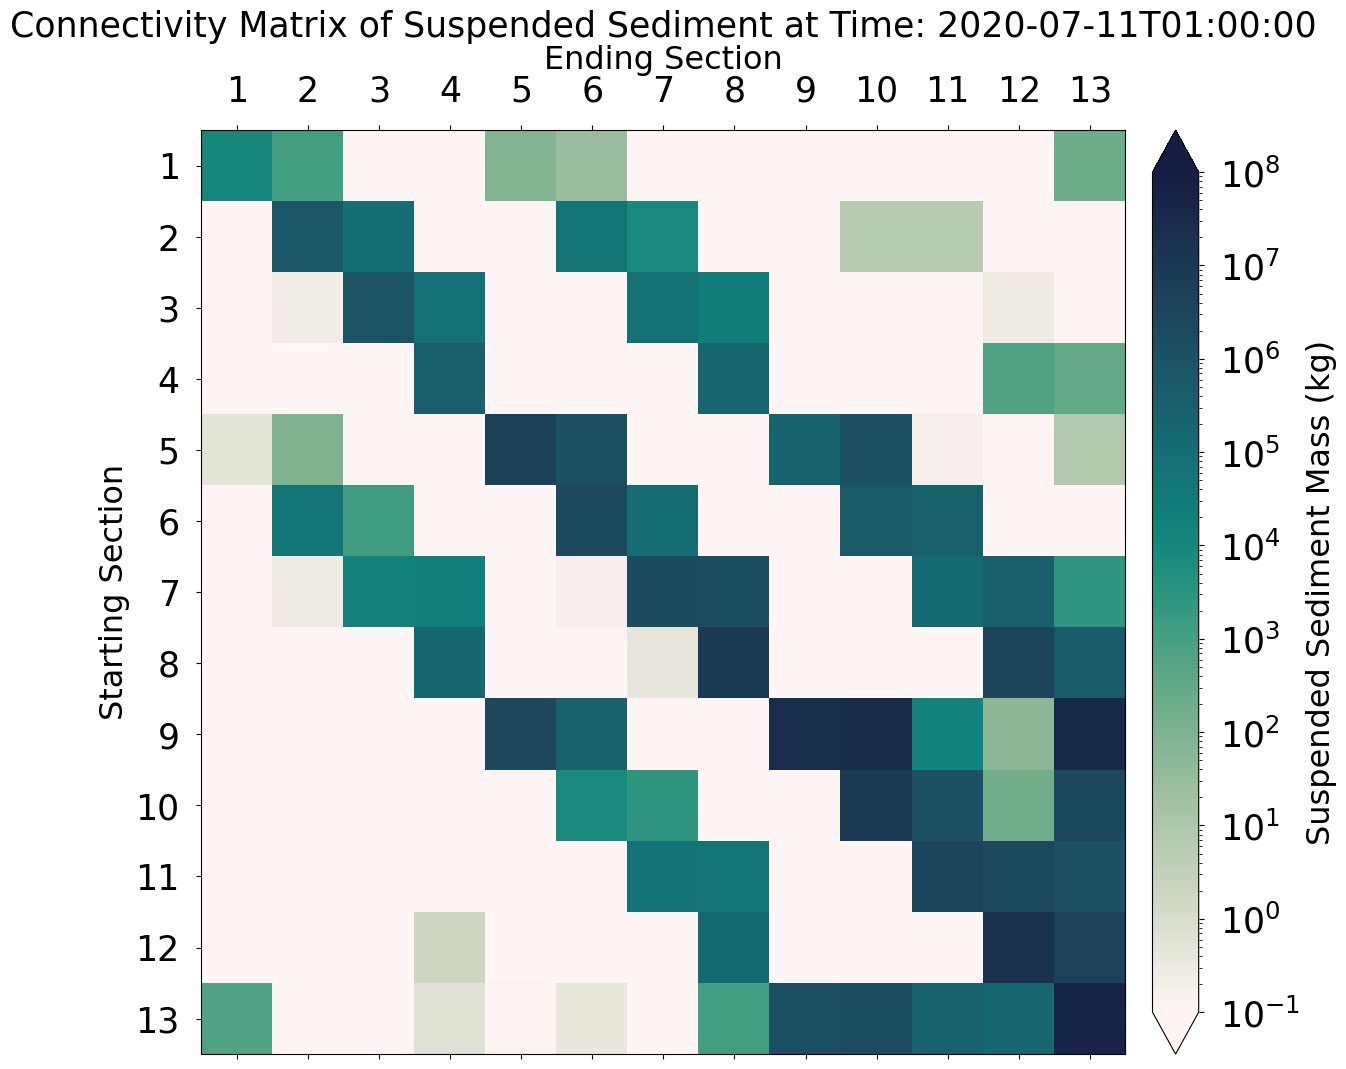

In [19]:
# Plot this...

# Set the range 
log_norm = colors.LogNorm(vmin=1e-1, vmax=1e8)

# Make the labels
x_labels_short = ['1', '2', '3', '4', '5', '6',
           '7', '8', '9', '10', '11', '12', '13']
x_labels_long = ['Section 1', 'Section 2', 'Section 3', 'Section 4', 'Section 5', 'Section 6',
           'Section 7', 'Section 8', 'Section 9', 'Section 10', 'Section 11', 'Section 12', 'Section 13']

# Make the figure
fig1, ax1 = plt.subplots(figsize=(35,12))

# Plot the data
m1 = ax1.matshow(giant_sed_mat_aug15_agg, norm=log_norm, cmap=cmocean.cm.tempo)

# Set the labels
ax1.set_xticklabels(x_labels_short)
ax1.set_xticks(np.arange(len(x_labels_short)))
ax1.set_yticklabels(x_labels_short)
ax1.set_yticks(np.arange(len(x_labels_short)))

# Label the axes
ax1.set_title('Connectivity Matrix of Suspended Sediment at Time: ' + str(model_output_01_agg.ocean_time[time_idx_aug_01].values)[0:19], fontsize=fontsize)
ax1.set_xlabel('Ending Section', fontsize=fontsize-2)
ax1.xaxis.set_label_position('top')
ax1.set_ylabel('Starting Section', fontsize=fontsize-2)

# Add the colorbar
cbar1 = plt.colorbar(m1, extend='both', pad=0.01).set_label('Suspended Sediment Mass (kg)', fontsize=fontsize-2)


In [20]:
# Now that the test works, make one for multiple time steps, 
# then plot all of them in a giant subplot for everyyyyyy 2 weeks? (8 plots)
# 

In [21]:
# # Make a giant plot of all of the different times 

# # Set the range 
# log_norm = colors.LogNorm(vmin=1e-1, vmax=1e10)

# # Make the labels
# x_labels_short = ['1', '2', '3', '4', '5', '6',
#            '7', '8', '9', '10', '11', '12', '13']
# x_labels_long = ['Section 1', 'Section 2', 'Section 3', 'Section 4', 'Section 5', 'Section 6',
#            'Section 7', 'Section 8', 'Section 9', 'Section 10', 'Section 11', 'Section 12', 'Section 13']

# # Make the figure
# fig2, ax2 = plt.subplots(2, 4, figsize=(25,12))

# # Set the title
# fig2.suptitle('Connectivity Matrix of Suspended Sediment', fontsize=fontsize, y=1.03)

# # Plot the data
# # July 15
# m2 = ax2[0,0].matshow(giant_sed_mat_jul15, norm=log_norm, cmap=cmocean.cm.tempo)
# ax2[0,0].set_xticklabels(x_labels_short, fontsize=fontsize-5)
# ax2[0,0].set_xticks(np.arange(len(x_labels_short)))
# ax2[0,0].set_yticklabels(x_labels_short, fontsize=fontsize-5)
# ax2[0,0].set_yticks(np.arange(len(x_labels_short)))
# ax2[0,0].set_title('July 15', fontsize=fontsize)
# #ax2[0,0].set_title('Time: ' + str(model_output_01.ocean_time[time_idx_jul_15].values)[0:19], fontsize=fontsize)

# # August 1
# m3 = ax2[0,1].matshow(giant_sed_mat_aug01, norm=log_norm, cmap=cmocean.cm.tempo)
# ax2[0,1].set_xticklabels(x_labels_short, fontsize=fontsize-5)
# ax2[0,1].set_xticks(np.arange(len(x_labels_short)))
# ax2[0,1].set_yticklabels(x_labels_short, fontsize=fontsize-5)
# ax2[0,1].set_yticks(np.arange(len(x_labels_short)))
# ax2[0,1].set_title('August 1', fontsize=fontsize)
# #ax2[0,1].set_title('Time: ' + str(model_output_02.ocean_time[time_idx_aug_01].values)[0:19], fontsize=fontsize)

# # August 15
# m4 = ax2[0,2].matshow(giant_sed_mat_aug15, norm=log_norm, cmap=cmocean.cm.tempo)
# ax2[0,2].set_xticklabels(x_labels_short, fontsize=fontsize-5)
# ax2[0,2].set_xticks(np.arange(len(x_labels_short)))
# ax2[0,2].set_yticklabels(x_labels_short, fontsize=fontsize-5)
# ax2[0,2].set_yticks(np.arange(len(x_labels_short)))
# ax2[0,2].set_title('August 15', fontsize=fontsize)
# #ax2[0,2].set_title('Time: ' + str(model_output_03.ocean_time[time_idx_aug_15].values)[0:19], fontsize=fontsize)

# # September 1
# m4 = ax2[0,3].matshow(giant_sed_mat_sep01, norm=log_norm, cmap=cmocean.cm.tempo)
# ax2[0,3].set_xticklabels(x_labels_short, fontsize=fontsize-5)
# ax2[0,3].set_xticks(np.arange(len(x_labels_short)))
# ax2[0,3].set_yticklabels(x_labels_short, fontsize=fontsize-5)
# ax2[0,3].set_yticks(np.arange(len(x_labels_short)))
# ax2[0,3].set_title('September 1', fontsize=fontsize)
# #ax2[0,3].set_title('Time: ' + str(model_output_04.ocean_time[time_idx_sep_01].values)[0:19], fontsize=fontsize)

# # September 15
# m4 = ax2[1,0].matshow(giant_sed_mat_sep15, norm=log_norm, cmap=cmocean.cm.tempo)
# ax2[1,0].set_xticklabels(x_labels_short, fontsize=fontsize-5)
# ax2[1,0].set_xticks(np.arange(len(x_labels_short)))
# ax2[1,0].set_yticklabels(x_labels_short, fontsize=fontsize-5)
# ax2[1,0].set_yticks(np.arange(len(x_labels_short)))
# ax2[1,0].set_title('September 15', fontsize=fontsize)
# #ax2[1,0].set_title('Time: ' + str(model_output_05.ocean_time[time_idx_sep_15].values)[0:19], fontsize=fontsize)

# # October 1
# m4 = ax2[1,1].matshow(giant_sed_mat_oct01, norm=log_norm, cmap=cmocean.cm.tempo)
# ax2[1,1].set_xticklabels(x_labels_short, fontsize=fontsize-5)
# ax2[1,1].set_xticks(np.arange(len(x_labels_short)))
# ax2[1,1].set_yticklabels(x_labels_short, fontsize=fontsize-5)
# ax2[1,1].set_yticks(np.arange(len(x_labels_short)))
# ax2[1,1].set_title('October 1', fontsize=fontsize)
# #ax2[1,1].set_title('Time: ' + str(model_output_06.ocean_time[time_idx_oct_01].values)[0:19], fontsize=fontsize)

# # October 15
# m4 = ax2[1,2].matshow(giant_sed_mat_oct15, norm=log_norm, cmap=cmocean.cm.tempo)
# ax2[1,2].set_xticklabels(x_labels_short, fontsize=fontsize-5)
# ax2[1,2].set_xticks(np.arange(len(x_labels_short)))
# ax2[1,2].set_yticklabels(x_labels_short, fontsize=fontsize-5)
# ax2[1,2].set_yticks(np.arange(len(x_labels_short)))
# ax2[1,2].set_title('October 15', fontsize=fontsize)
# #ax2[1,2].set_title('Time: ' + str(model_output_07.ocean_time[time_idx_oct_15].values)[0:19], fontsize=fontsize)

# # November 1
# m4 = ax2[1,3].matshow(giant_sed_mat_nov01, norm=log_norm, cmap=cmocean.cm.tempo)
# ax2[1,3].set_xticklabels(x_labels_short, fontsize=fontsize-5)
# ax2[1,3].set_xticks(np.arange(len(x_labels_short)))
# ax2[1,3].set_yticklabels(x_labels_short, fontsize=fontsize-5)
# ax2[1,3].set_yticks(np.arange(len(x_labels_short)))
# ax2[1,3].set_title('November 1', fontsize=fontsize)
# #ax2[1,3].set_title('Time: ' + str(model_output_08.ocean_time[time_idx_nov_01].values)[0:19], fontsize=fontsize)


# # Label the axes
# #  x labels
# ax2[0,0].set_xlabel('Ending Section', fontsize=fontsize-2)
# ax2[0,0].xaxis.set_label_position('top')
# ax2[0,1].set_xlabel('Ending Section', fontsize=fontsize-2)
# ax2[0,1].xaxis.set_label_position('top')
# ax2[0,2].set_xlabel('Ending Section', fontsize=fontsize-2)
# ax2[0,2].xaxis.set_label_position('top')
# ax2[0,3].set_xlabel('Ending Section', fontsize=fontsize-2)
# ax2[0,3].xaxis.set_label_position('top')

# # y labels
# ax2[0,0].set_ylabel('Starting Section', fontsize=fontsize-2)
# ax2[1,0].set_ylabel('Starting Section', fontsize=fontsize-2)

# # Adjust subplot spacing
# plt.subplots_adjust(hspace=0.35) #0.08 # (0.22, 0.25)

# # Add the colorbar
# cbar2_ax = fig2.add_axes([0.14, 0.035, 0.74, 0.05])
# cbar2 = plt.colorbar(m2, cax=cbar2_ax, orientation='horizontal', extend='both').set_label(label='Suspended Sediment Mass (kg)', size=fontsize)

# # Save the figure
# # Aggregated 
# #plt.savefig('/projects/brun1463/ROMS/Beaufort_Shelf_Rivers_Alpine_002/Scripts/Analysis/Connectivity_matrices/aggregated_matrix_001.png')
# # Unaggregated 
# #plt.savefig('/projects/brun1463/ROMS/Beaufort_Shelf_Rivers_Alpine_002/Scripts/Analysis/Connectivity_matrices/unaggregated_matrix_002.png')

In [22]:
# Make another plot that is the same as above but a combo of unaggregated and 
# aggregated mud runs with on on top and the other on bottom for the 
# 15th of every month 

/projects/brun1463/code-server/tmp/ipykernel_792577/2495885694.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax3[0,0].set_xticklabels(x_labels_short, fontsize=fontsize-5)
/projects/brun1463/code-server/tmp/ipykernel_792577/2495885694.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax3[0,0].set_yticklabels(x_labels_short, fontsize=fontsize-5)
/projects/brun1463/code-server/tmp/ipykernel_792577/2495885694.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax3[0,1].set_xticklabels(x_labels_short, fontsize=fontsize-5)
/projects/brun1463/code-server/tmp/ipykernel_792577/2495885694.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax3[0,1].set_y

Text(0.001, 0.3, 'Unaggregated')

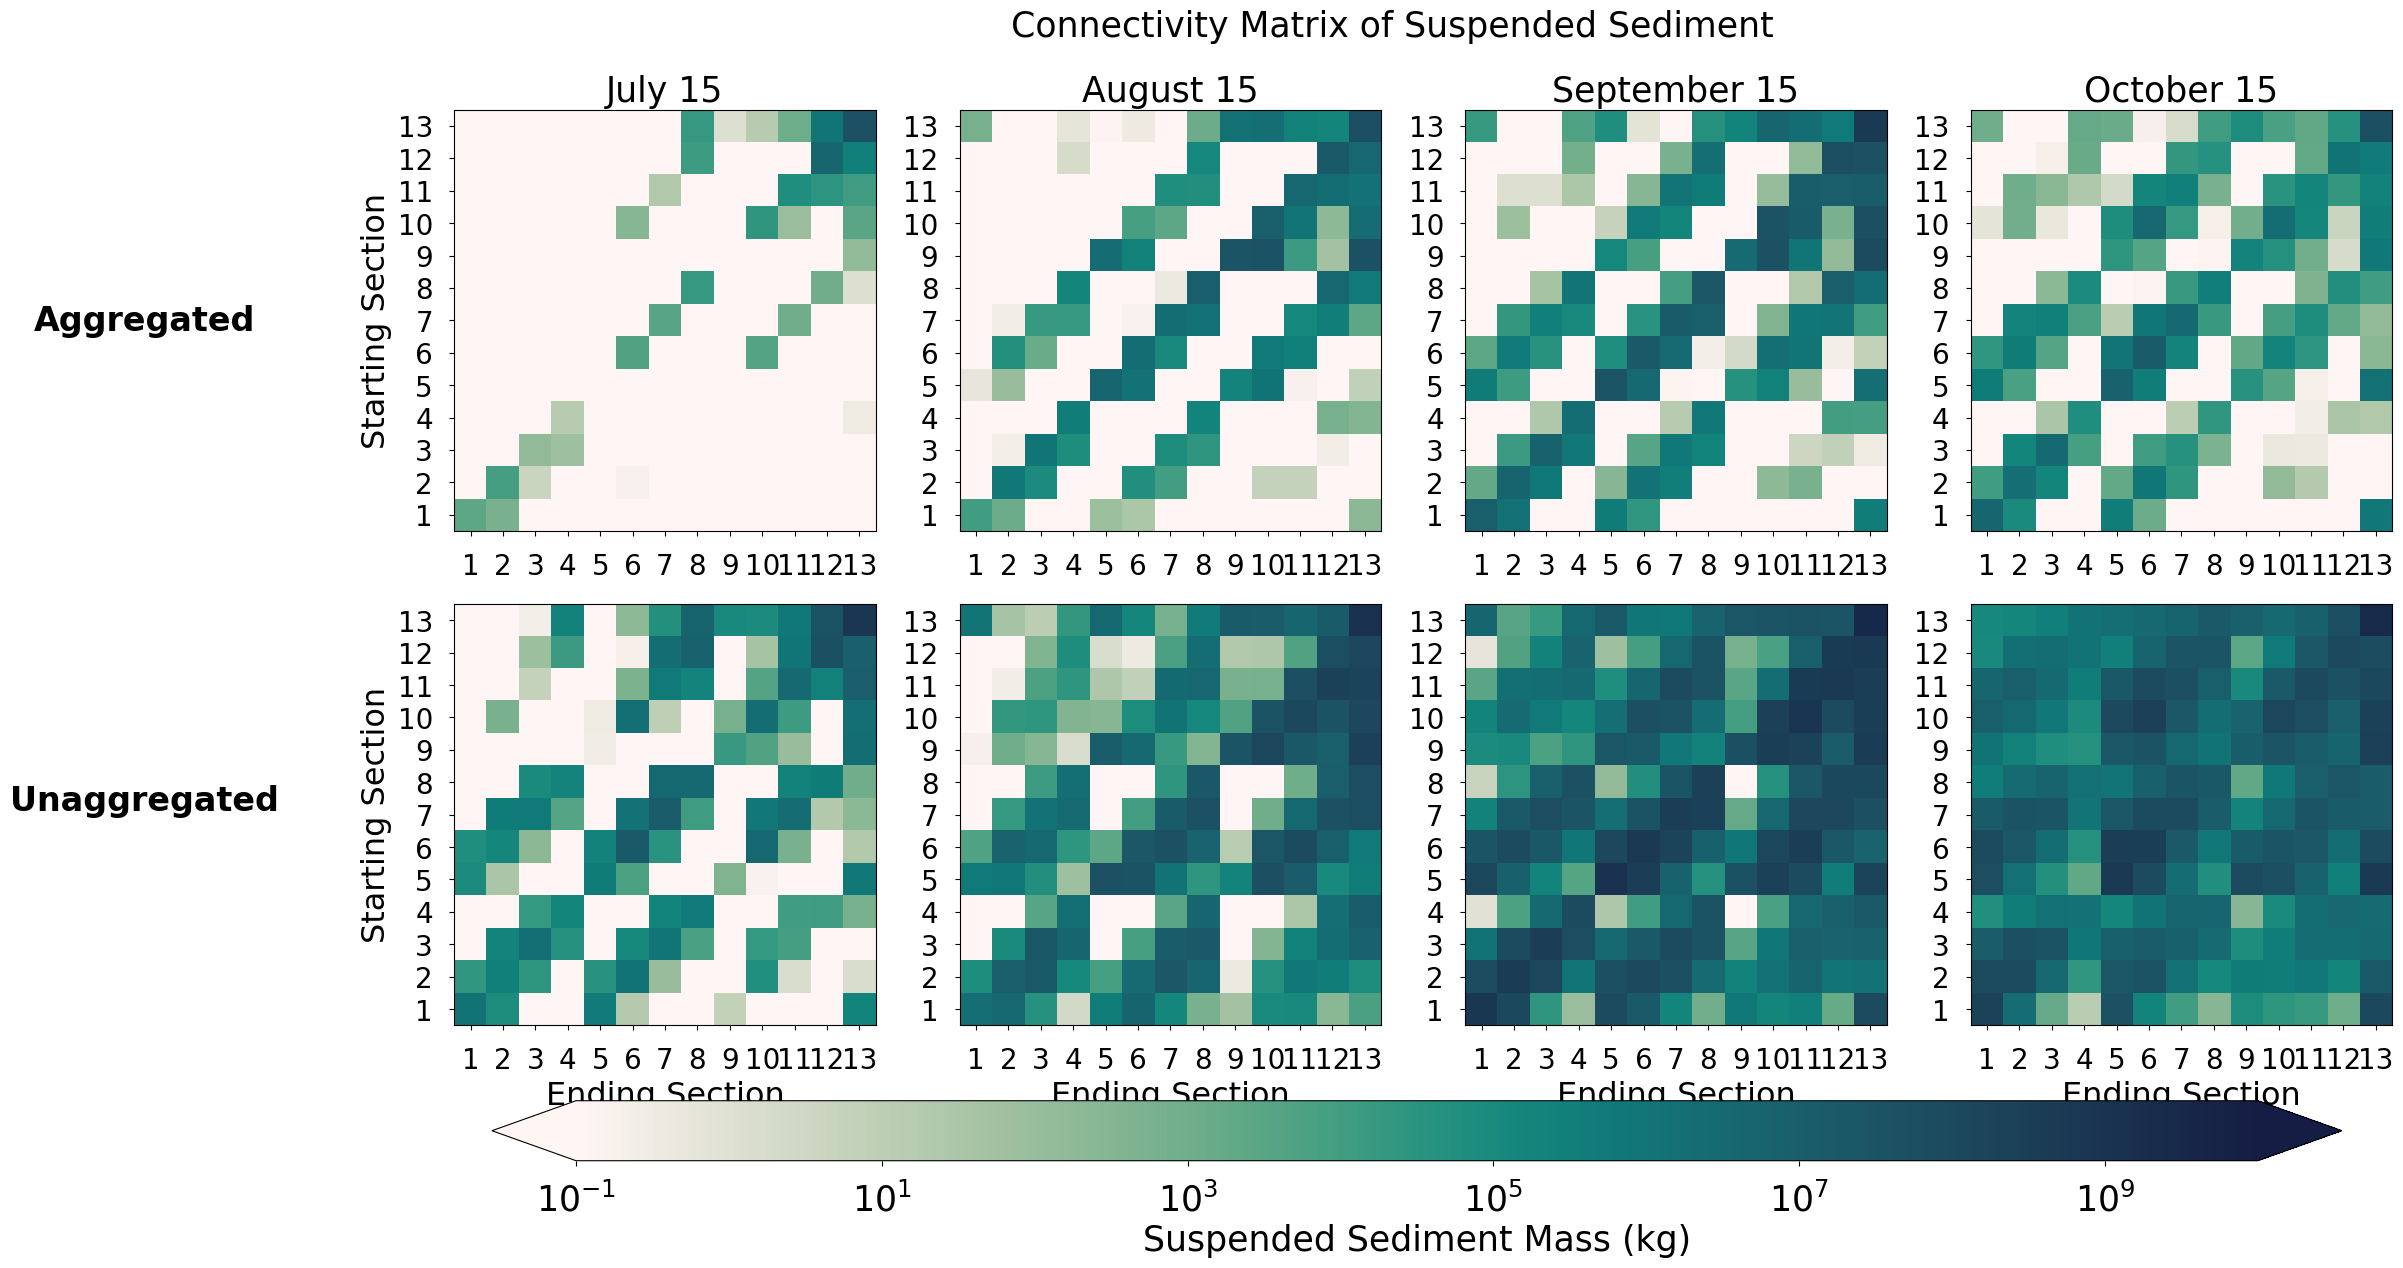

In [23]:
# Make a giant plot of all of the different times 

# Set the range 
log_norm = colors.LogNorm(vmin=1e-1, vmax=1e10)

# Make the labels
x_labels_short = ['1', '2', '3', '4', '5', '6',
           '7', '8', '9', '10', '11', '12', '13']
x_labels_long = ['Section 1', 'Section 2', 'Section 3', 'Section 4', 'Section 5', 'Section 6',
           'Section 7', 'Section 8', 'Section 9', 'Section 10', 'Section 11', 'Section 12', 'Section 13']

# Make the figure
fig3, ax3 = plt.subplots(2, 4, figsize=(25,12))

# Set the title
fig3.suptitle('Connectivity Matrix of Suspended Sediment', fontsize=fontsize, y=0.96)

# Plot the data
# July 15 - Aggregated
m2 = ax3[0,0].matshow(giant_sed_mat_jul15_agg, norm=log_norm, cmap=cmocean.cm.tempo, origin='lower')
ax3[0,0].set_xticklabels(x_labels_short, fontsize=fontsize-5)
ax3[0,0].set_xticks(np.arange(len(x_labels_short)))
ax3[0,0].set_yticklabels(x_labels_short, fontsize=fontsize-5)
ax3[0,0].set_yticks(np.arange(len(x_labels_short)))
ax3[0,0].set_title('July 15', fontsize=fontsize)
#ax3[0,0].set_title('Time: ' + str(model_output_01.ocean_time[time_idx_jul_15].values)[0:19], fontsize=fontsize)


# August 15 - Aggregated
m2 = ax3[0,1].matshow(giant_sed_mat_aug15_agg, norm=log_norm, cmap=cmocean.cm.tempo, origin='lower')
ax3[0,1].set_xticklabels(x_labels_short, fontsize=fontsize-5)
ax3[0,1].set_xticks(np.arange(len(x_labels_short)))
ax3[0,1].set_yticklabels(x_labels_short, fontsize=fontsize-5)
ax3[0,1].set_yticks(np.arange(len(x_labels_short)))
ax3[0,1].set_title('August 15', fontsize=fontsize)
#ax3[0,1].set_title('Time: ' + str(model_output_01.ocean_time[time_idx_jul_15].values)[0:19], fontsize=fontsize)


# September 15 - Aggregated
m2 = ax3[0,2].matshow(giant_sed_mat_sep15_agg, norm=log_norm, cmap=cmocean.cm.tempo, origin='lower')
ax3[0,2].set_xticklabels(x_labels_short, fontsize=fontsize-5)
ax3[0,2].set_xticks(np.arange(len(x_labels_short)))
ax3[0,2].set_yticklabels(x_labels_short, fontsize=fontsize-5)
ax3[0,2].set_yticks(np.arange(len(x_labels_short)))
ax3[0,2].set_title('September 15', fontsize=fontsize)
#ax3[0,2].set_title('Time: ' + str(model_output_01.ocean_time[time_idx_jul_15].values)[0:19], fontsize=fontsize)

# October 15 - Aggregated
m2 = ax3[0,3].matshow(giant_sed_mat_oct15_agg, norm=log_norm, cmap=cmocean.cm.tempo, origin='lower')
ax3[0,3].set_xticklabels(x_labels_short, fontsize=fontsize-5)
ax3[0,3].set_xticks(np.arange(len(x_labels_short)))
ax3[0,3].set_yticklabels(x_labels_short, fontsize=fontsize-5)
ax3[0,3].set_yticks(np.arange(len(x_labels_short)))
ax3[0,3].set_title('October 15', fontsize=fontsize)
#ax3[0,3].set_title('Time: ' + str(model_output_01.ocean_time[time_idx_jul_15].values)[0:19], fontsize=fontsize)


# July 15 - Unaggregated
m2 = ax3[1,0].matshow(giant_sed_mat_jul15_unag, norm=log_norm, cmap=cmocean.cm.tempo, origin='lower')
ax3[1,0].set_xticklabels(x_labels_short, fontsize=fontsize-5)
ax3[1,0].set_xticks(np.arange(len(x_labels_short)))
ax3[1,0].set_yticklabels(x_labels_short, fontsize=fontsize-5)
ax3[1,0].set_yticks(np.arange(len(x_labels_short)))
#ax3[1,0].set_title('July 15', fontsize=fontsize)
#ax3[1,0].set_title('Time: ' + str(model_output_01.ocean_time[time_idx_jul_15].values)[0:19], fontsize=fontsize)

# August 15 - Unaggregated
m2 = ax3[1,1].matshow(giant_sed_mat_aug15_unag, norm=log_norm, cmap=cmocean.cm.tempo, origin='lower')
ax3[1,1].set_xticklabels(x_labels_short, fontsize=fontsize-5)
ax3[1,1].set_xticks(np.arange(len(x_labels_short)))
ax3[1,1].set_yticklabels(x_labels_short, fontsize=fontsize-5)
ax3[1,1].set_yticks(np.arange(len(x_labels_short)))
#ax3[1,1].set_title('August 15', fontsize=fontsize)
#ax3[1,1].set_title('Time: ' + str(model_output_01.ocean_time[time_idx_jul_15].values)[0:19], fontsize=fontsize)

# September 15 - Unaggregated
m2 = ax3[1,2].matshow(giant_sed_mat_sep15_unag, norm=log_norm, cmap=cmocean.cm.tempo, origin='lower')
ax3[1,2].set_xticklabels(x_labels_short, fontsize=fontsize-5)
ax3[1,2].set_xticks(np.arange(len(x_labels_short)))
ax3[1,2].set_yticklabels(x_labels_short, fontsize=fontsize-5)
ax3[1,2].set_yticks(np.arange(len(x_labels_short)))
#ax3[1,2].set_title('September 15', fontsize=fontsize)
#ax3[1,2].set_title('Time: ' + str(model_output_01.ocean_time[time_idx_jul_15].values)[0:19], fontsize=fontsize)

# October 15 - Unaggregated
m2 = ax3[1,3].matshow(giant_sed_mat_oct15_unag, norm=log_norm, cmap=cmocean.cm.tempo, origin='lower')
ax3[1,3].set_xticklabels(x_labels_short, fontsize=fontsize-5)
ax3[1,3].set_xticks(np.arange(len(x_labels_short)))
ax3[1,3].set_yticklabels(x_labels_short, fontsize=fontsize-5)
ax3[1,3].set_yticks(np.arange(len(x_labels_short)))
#ax3[1,3].set_title('October 15', fontsize=fontsize)
#ax3[1,3].set_title('Time: ' + str(model_output_01.ocean_time[time_idx_jul_15].values)[0:19], fontsize=fontsize)


# Move x-ticks to the bottom
ax3[0,0].tick_params(top=False, labeltop=False, bottom=True, labelbottom=True)
ax3[0,1].tick_params(top=False, labeltop=False, bottom=True, labelbottom=True)
ax3[0,2].tick_params(top=False, labeltop=False, bottom=True, labelbottom=True)
ax3[0,3].tick_params(top=False, labeltop=False, bottom=True, labelbottom=True)
ax3[1,0].tick_params(top=False, labeltop=False, bottom=True, labelbottom=True)
ax3[1,1].tick_params(top=False, labeltop=False, bottom=True, labelbottom=True)
ax3[1,2].tick_params(top=False, labeltop=False, bottom=True, labelbottom=True)
ax3[1,3].tick_params(top=False, labeltop=False, bottom=True, labelbottom=True)

# Label the axes
#  x labels
ax3[1,0].set_xlabel('Ending Section', fontsize=fontsize-2)
ax3[1,0].xaxis.set_label_position('bottom')
ax3[1,1].set_xlabel('Ending Section', fontsize=fontsize-2)
ax3[1,1].xaxis.set_label_position('bottom')
ax3[1,2].set_xlabel('Ending Section', fontsize=fontsize-2)
ax3[1,2].xaxis.set_label_position('bottom')
ax3[1,3].set_xlabel('Ending Section', fontsize=fontsize-2)
ax3[1,3].xaxis.set_label_position('bottom')

# y labels
ax3[0,0].set_ylabel('Starting Section', fontsize=fontsize-2)
ax3[1,0].set_ylabel('Starting Section', fontsize=fontsize-2)

# Adjust subplot spacing
plt.subplots_adjust(hspace=0.15) #0.08 # (0.22, 0.25)

# Add the colorbar
cbar3_ax = fig3.add_axes([0.14, 0.0007, 0.74, 0.05])
cbar3 = plt.colorbar(m2, cax=cbar3_ax, orientation='horizontal', extend='both').set_label(label='Suspended Sediment Mass (kg)', size=fontsize)

# Label the rows 
fig3.text(0.001, 0.7, 'Aggregated', rotation='horizontal', fontsize=fontsize-1, fontweight='bold', ha="center", va="center")
fig3.text(0.001, 0.30, 'Unaggregated', rotation='horizontal', fontsize=fontsize-1, fontweight='bold', ha="center", va="center")
#fig6.text(0.97, 0.55, "River \nDischarge \n(m\u00b3/s)", ha="center", va="center", rotation=0, fontsize=fontsize+5, color='green')
#fig6.text(0.5, 0.92, 'River Sediment Mass by Depth & Time (kg)', ha="center", va="center", rotation=0, fontsize=fontsize+5)

# Save the figure
# Combo
#plt.savefig('/projects/brun1463/ROMS/Beaufort_Shelf_Rivers_Alpine_002/Scripts/Analysis/Connectivity_matrices/agg_unagg_monthly_matrix_001.png', transparent=True, bbox_inches='tight')

/projects/brun1463/code-server/tmp/ipykernel_792577/1048187765.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax3[0,0].set_xticklabels(x_labels_short_no13, fontsize=fontsize-5)
/projects/brun1463/code-server/tmp/ipykernel_792577/1048187765.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax3[0,0].set_yticklabels(x_labels_short_no13, fontsize=fontsize-5)
/projects/brun1463/code-server/tmp/ipykernel_792577/1048187765.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax3[0,1].set_xticklabels(x_labels_short_no13, fontsize=fontsize-5)
/projects/brun1463/code-server/tmp/ipykernel_792577/1048187765.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
 

Text(0.001, 0.3, 'Unaggregated')

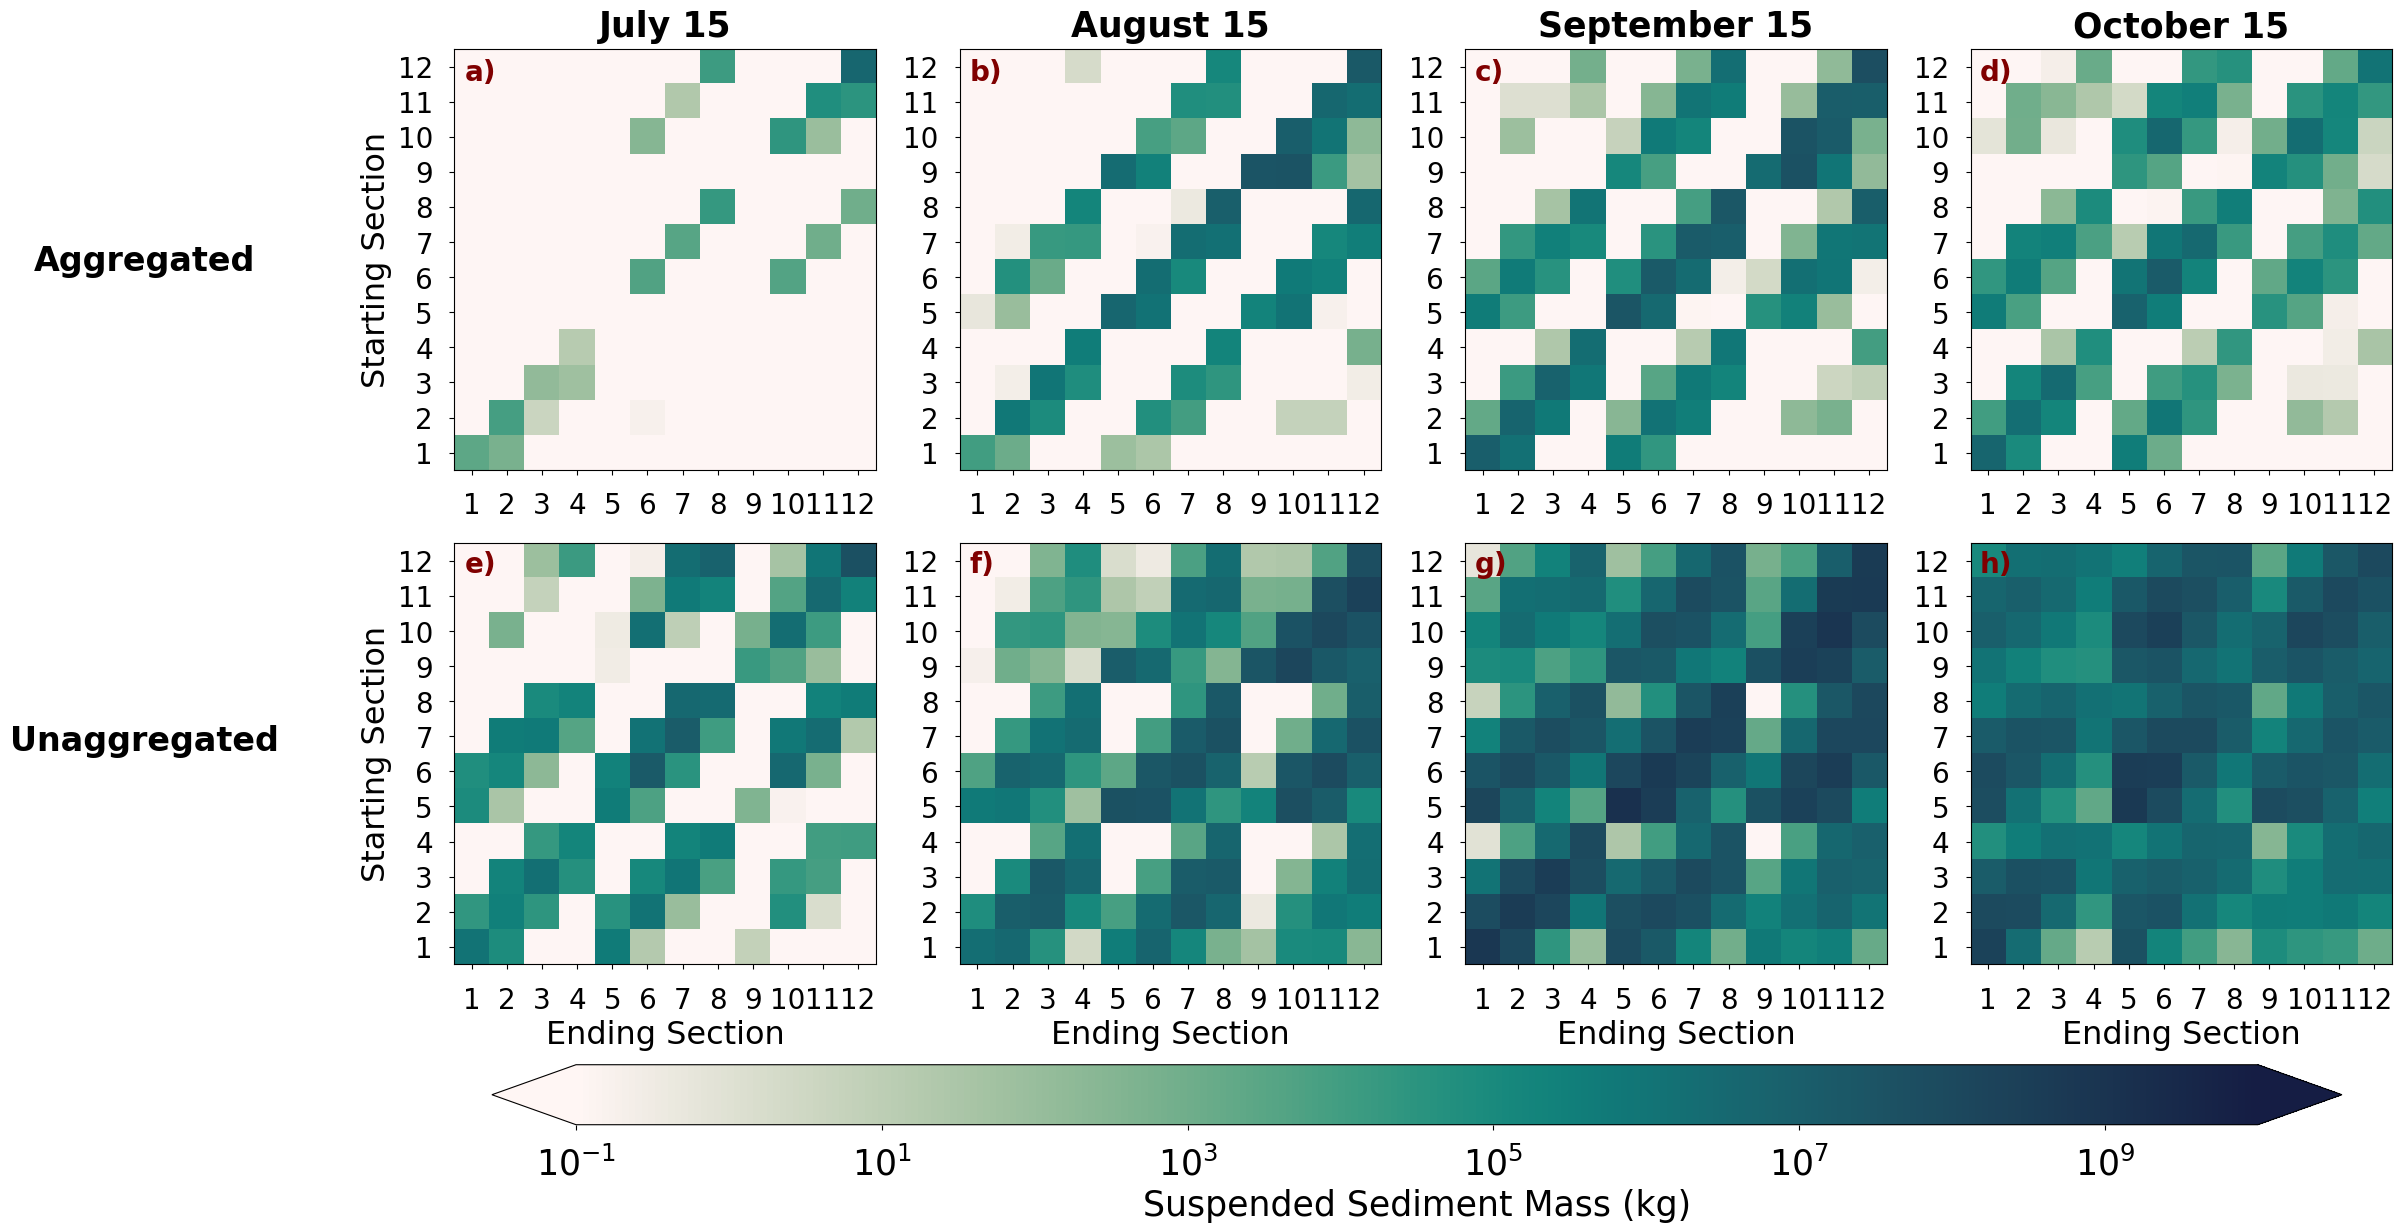

In [27]:
# Make a version that does not have section 13
# Make a giant plot of all of the different times 

# Set the range 
log_norm = colors.LogNorm(vmin=1e-1, vmax=1e10)

# Make the labels
x_labels_short_no13 = ['1', '2', '3', '4', '5', '6',
           '7', '8', '9', '10', '11', '12']
x_labels_long_no13 = ['Section 1', 'Section 2', 'Section 3', 'Section 4', 'Section 5', 'Section 6',
           'Section 7', 'Section 8', 'Section 9', 'Section 10', 'Section 11', 'Section 12']

# Make the figure
fig3, ax3 = plt.subplots(2, 4, figsize=(25,12))

# Set the title
#fig3.suptitle('Connectivity Matrix of Suspended Sediment', fontsize=fontsize, y=0.96)

# Plot the data
# July 15 - Aggregated
m2 = ax3[0,0].matshow(giant_sed_mat_jul15_agg[:-1,:-1], norm=log_norm, cmap=cmocean.cm.tempo, origin='lower')
ax3[0,0].set_xticklabels(x_labels_short_no13, fontsize=fontsize-5)
ax3[0,0].set_xticks(np.arange(len(x_labels_short_no13)))
ax3[0,0].set_yticklabels(x_labels_short_no13, fontsize=fontsize-5)
ax3[0,0].set_yticks(np.arange(len(x_labels_short_no13)))
ax3[0,0].set_title('July 15', y=1.01, fontsize=fontsize, weight='bold')
#ax3[0,0].set_title('Time: ' + str(model_output_01.ocean_time[time_idx_jul_15].values)[0:19], fontsize=fontsize)


# August 15 - Aggregated
m2 = ax3[0,1].matshow(giant_sed_mat_aug15_agg[:-1,:-1], norm=log_norm, cmap=cmocean.cm.tempo, origin='lower')
ax3[0,1].set_xticklabels(x_labels_short_no13, fontsize=fontsize-5)
ax3[0,1].set_xticks(np.arange(len(x_labels_short_no13)))
ax3[0,1].set_yticklabels(x_labels_short_no13, fontsize=fontsize-5)
ax3[0,1].set_yticks(np.arange(len(x_labels_short_no13)))
ax3[0,1].set_title('August 15', y=1.01, fontsize=fontsize, weight='bold')
#ax3[0,1].set_title('Time: ' + str(model_output_01.ocean_time[time_idx_jul_15].values)[0:19], fontsize=fontsize)


# September 15 - Aggregated
m2 = ax3[0,2].matshow(giant_sed_mat_sep15_agg[:-1,:-1], norm=log_norm, cmap=cmocean.cm.tempo, origin='lower')
ax3[0,2].set_xticklabels(x_labels_short_no13, fontsize=fontsize-5)
ax3[0,2].set_xticks(np.arange(len(x_labels_short_no13)))
ax3[0,2].set_yticklabels(x_labels_short_no13, fontsize=fontsize-5)
ax3[0,2].set_yticks(np.arange(len(x_labels_short_no13)))
ax3[0,2].set_title('September 15', y=1.01, fontsize=fontsize, weight='bold')
#ax3[0,2].set_title('Time: ' + str(model_output_01.ocean_time[time_idx_jul_15].values)[0:19], fontsize=fontsize)

# October 15 - Aggregated
m2 = ax3[0,3].matshow(giant_sed_mat_oct15_agg[:-1,:-1], norm=log_norm, cmap=cmocean.cm.tempo, origin='lower')
ax3[0,3].set_xticklabels(x_labels_short_no13, fontsize=fontsize-5)
ax3[0,3].set_xticks(np.arange(len(x_labels_short_no13)))
ax3[0,3].set_yticklabels(x_labels_short_no13, fontsize=fontsize-5)
ax3[0,3].set_yticks(np.arange(len(x_labels_short_no13)))
ax3[0,3].set_title('October 15', y=1.01, fontsize=fontsize, weight='bold')
#ax3[0,3].set_title('Time: ' + str(model_output_01.ocean_time[time_idx_jul_15].values)[0:19], fontsize=fontsize)


# July 15 - Unaggregated
m2 = ax3[1,0].matshow(giant_sed_mat_jul15_unag[:-1,:-1], norm=log_norm, cmap=cmocean.cm.tempo, origin='lower')
ax3[1,0].set_xticklabels(x_labels_short_no13, fontsize=fontsize-5)
ax3[1,0].set_xticks(np.arange(len(x_labels_short_no13)))
ax3[1,0].set_yticklabels(x_labels_short_no13, fontsize=fontsize-5)
ax3[1,0].set_yticks(np.arange(len(x_labels_short_no13)))
#ax3[1,0].set_title('July 15', fontsize=fontsize)
#ax3[1,0].set_title('Time: ' + str(model_output_01.ocean_time[time_idx_jul_15].values)[0:19], fontsize=fontsize)

# August 15 - Unaggregated
m2 = ax3[1,1].matshow(giant_sed_mat_aug15_unag[:-1,:-1], norm=log_norm, cmap=cmocean.cm.tempo, origin='lower')
ax3[1,1].set_xticklabels(x_labels_short_no13, fontsize=fontsize-5)
ax3[1,1].set_xticks(np.arange(len(x_labels_short_no13)))
ax3[1,1].set_yticklabels(x_labels_short_no13, fontsize=fontsize-5)
ax3[1,1].set_yticks(np.arange(len(x_labels_short_no13)))
#ax3[1,1].set_title('August 15', fontsize=fontsize)
#ax3[1,1].set_title('Time: ' + str(model_output_01.ocean_time[time_idx_jul_15].values)[0:19], fontsize=fontsize)

# September 15 - Unaggregated
m2 = ax3[1,2].matshow(giant_sed_mat_sep15_unag[:-1,:-1], norm=log_norm, cmap=cmocean.cm.tempo, origin='lower')
ax3[1,2].set_xticklabels(x_labels_short_no13, fontsize=fontsize-5)
ax3[1,2].set_xticks(np.arange(len(x_labels_short_no13)))
ax3[1,2].set_yticklabels(x_labels_short_no13, fontsize=fontsize-5)
ax3[1,2].set_yticks(np.arange(len(x_labels_short_no13)))
#ax3[1,2].set_title('September 15', fontsize=fontsize)
#ax3[1,2].set_title('Time: ' + str(model_output_01.ocean_time[time_idx_jul_15].values)[0:19], fontsize=fontsize)

# October 15 - Unaggregated
m2 = ax3[1,3].matshow(giant_sed_mat_oct15_unag[:-1,:-1], norm=log_norm, cmap=cmocean.cm.tempo, origin='lower')
ax3[1,3].set_xticklabels(x_labels_short_no13, fontsize=fontsize-5)
ax3[1,3].set_xticks(np.arange(len(x_labels_short_no13)))
ax3[1,3].set_yticklabels(x_labels_short_no13, fontsize=fontsize-5)
ax3[1,3].set_yticks(np.arange(len(x_labels_short_no13)))
#ax3[1,3].set_title('October 15', fontsize=fontsize)
#ax3[1,3].set_title('Time: ' + str(model_output_01.ocean_time[time_idx_jul_15].values)[0:19], fontsize=fontsize)


# Move x-ticks to the bottom
ax3[0,0].tick_params(top=False, labeltop=False, bottom=True, labelbottom=True)
ax3[0,1].tick_params(top=False, labeltop=False, bottom=True, labelbottom=True)
ax3[0,2].tick_params(top=False, labeltop=False, bottom=True, labelbottom=True)
ax3[0,3].tick_params(top=False, labeltop=False, bottom=True, labelbottom=True)
ax3[1,0].tick_params(top=False, labeltop=False, bottom=True, labelbottom=True)
ax3[1,1].tick_params(top=False, labeltop=False, bottom=True, labelbottom=True)
ax3[1,2].tick_params(top=False, labeltop=False, bottom=True, labelbottom=True)
ax3[1,3].tick_params(top=False, labeltop=False, bottom=True, labelbottom=True)

# Label the axes
#  x labels
ax3[1,0].set_xlabel('Ending Section', fontsize=fontsize-2)
ax3[1,0].xaxis.set_label_position('bottom')
ax3[1,1].set_xlabel('Ending Section', fontsize=fontsize-2)
ax3[1,1].xaxis.set_label_position('bottom')
ax3[1,2].set_xlabel('Ending Section', fontsize=fontsize-2)
ax3[1,2].xaxis.set_label_position('bottom')
ax3[1,3].set_xlabel('Ending Section', fontsize=fontsize-2)
ax3[1,3].xaxis.set_label_position('bottom')

# y labels
ax3[0,0].set_ylabel('Starting Section', fontsize=fontsize-2)
ax3[1,0].set_ylabel('Starting Section', fontsize=fontsize-2)

# Adjust subplot spacing
plt.subplots_adjust(hspace=0.15) #0.08 # (0.22, 0.25)

# Add the colorbar
cbar3_ax = fig3.add_axes([0.14, -0.02, 0.74, 0.05]) #[0.14, 0.000007, 0.74, 0.05]
cbar3 = plt.colorbar(m2, cax=cbar3_ax, orientation='horizontal', extend='both').set_label(label='Suspended Sediment Mass (kg)', size=fontsize)

# Add subplot labels 
fig3.text(0.129, 0.850, 'a)', color='maroon', fontsize=fontsize-5, weight='bold')
fig3.text(0.331, 0.850, 'b)', color='maroon', fontsize=fontsize-5, weight='bold')
fig3.text(0.533, 0.850, 'c)', color='maroon', fontsize=fontsize-5, weight='bold')
fig3.text(0.735, 0.850, 'd)', color='maroon', fontsize=fontsize-5, weight='bold')
fig3.text(0.129, 0.440, 'e)', color='maroon', fontsize=fontsize-5, weight='bold')
fig3.text(0.331, 0.440, 'f)', color='maroon', fontsize=fontsize-5, weight='bold')
fig3.text(0.533, 0.440, 'g)', color='maroon', fontsize=fontsize-5, weight='bold')
fig3.text(0.735, 0.440, 'h)', color='maroon', fontsize=fontsize-5, weight='bold')

# Label the rows 
fig3.text(0.001, 0.7, 'Aggregated', rotation='horizontal', fontsize=fontsize-1, fontweight='bold', ha="center", va="center")
fig3.text(0.001, 0.30, 'Unaggregated', rotation='horizontal', fontsize=fontsize-1, fontweight='bold', ha="center", va="center")
#fig6.text(0.97, 0.55, "River \nDischarge \n(m\u00b3/s)", ha="center", va="center", rotation=0, fontsize=fontsize+5, color='green')
#fig6.text(0.5, 0.92, 'River Sediment Mass by Depth & Time (kg)', ha="center", va="center", rotation=0, fontsize=fontsize+5)

In [24]:
np.shape(giant_sed_mat_jul15_agg)

(13, 13)

In [26]:
g = np.arange(0,10,1)
print(g)
print(g[:-1])

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8]
